In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [32]:
import pandas as pd

df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [33]:
# Check number of rows and columns
print("Dataset shape:", df.shape)

# View column data types and missing value counts
df.info()

# See how many missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())


Dataset shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing values per column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration 

In [34]:
# Convert date_added to datetime, handle missing values
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Create year_added column only if date is not missing
df['year_added'] = df['date_added'].dt.year

# Drop duplicates
df.drop_duplicates(inplace=True)

# Check changes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8709 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB


## Question 1 – Movies vs TV Shows
We want to see whether Netflix has more Movies or TV Shows.  
This helps us understand the platform’s content strategy — is it focused more on long-form films or episodic series?

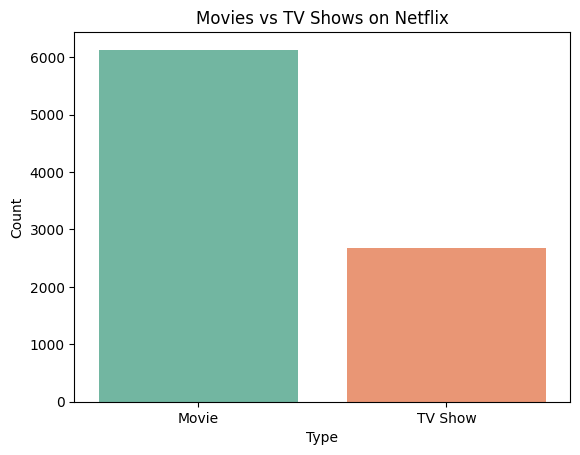

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="type", data=df, palette="Set2")
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


**Insight:** Movies dominate Netflix's catalog, making up around 70% of total content.  
This suggests Netflix focuses heavily on films compared to episodic series.


## Question 2 – Content Added by Year
We’ll look at the number of titles added to Netflix each year to see trends in content growth.  
This can also reveal how events like the COVID-19 pandemic affected Netflix’s releases.

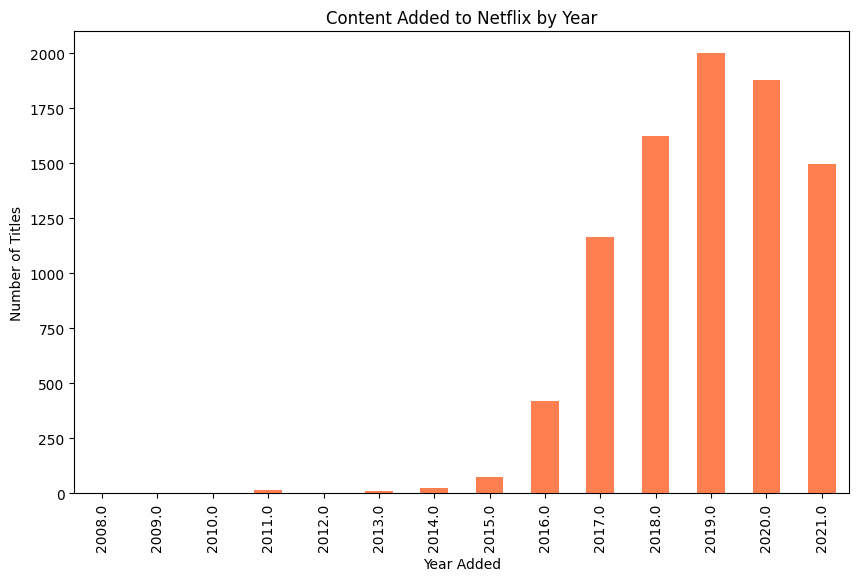

In [36]:
plt.figure(figsize=(10,6))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='coral')
plt.title("Content Added to Netflix by Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()


**Insight:** Content additions peaked around 2019, followed by a noticeable drop in 2020, likely due to the COVID-19 pandemic slowing production.

## Question 3 – Top 10 Content-Producing Countries
We’ll identify which countries produce the most content available on Netflix.  
This can highlight Netflix’s strongest production and acquisition markets.

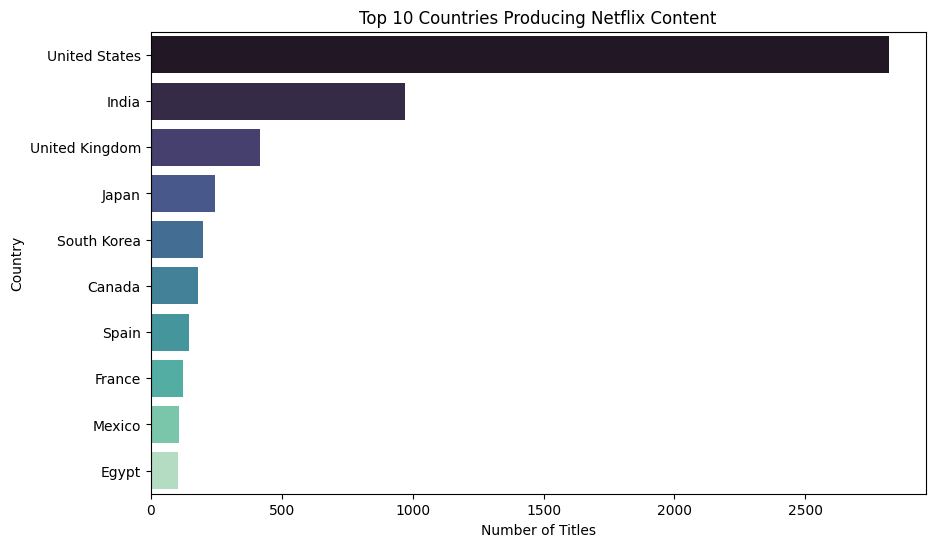

In [37]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="mako")
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


**Insight:** The United States leads by a large margin, followed by India, the UK, and other countries.  
This reflects Netflix’s strong presence in Hollywood and Bollywood.


## Question 4 – Most Common Ratings
Ratings indicate the target audience. We’ll see which ratings are most frequent to understand Netflix’s audience focus.

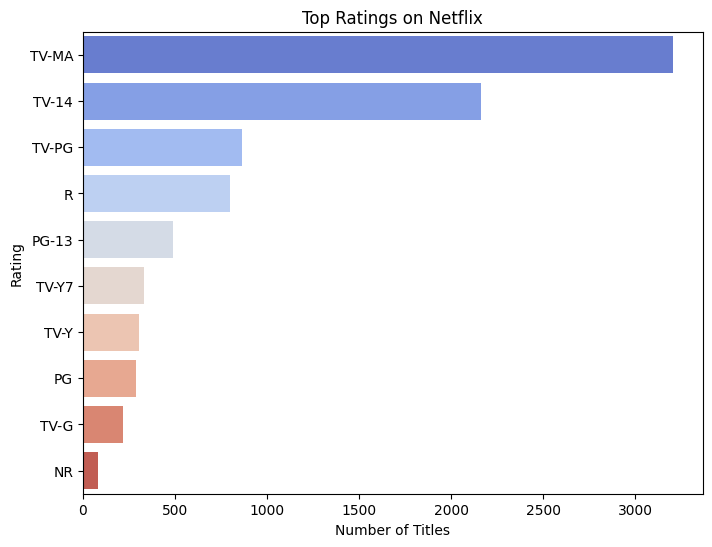

In [38]:
ratings_count = df['rating'].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=ratings_count.values, y=ratings_count.index, palette="coolwarm")
plt.title("Top Ratings on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.show()


**Insight:** TV-MA and TV-14 are the most frequent ratings, showing Netflix’s focus on mature and teen audiences.

## Question 5 – Top Genres
We’ll find the most common genres in Netflix’s catalog to see the platform’s dominant content types.

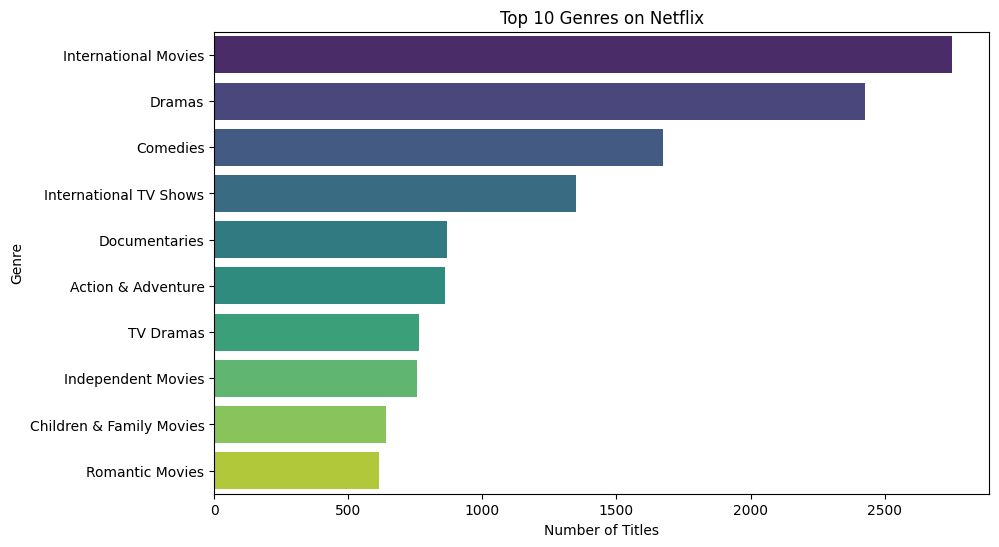

In [39]:
from collections import Counter

# Split genres and count
genre_list = df['listed_in'].dropna().apply(lambda x: x.split(','))
all_genres = [genre.strip() for sublist in genre_list for genre in sublist]
top_genres = Counter(all_genres).most_common(10)

# Plot
genres_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Genre', data=genres_df, palette="viridis")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


**Insight:** International Movies and Dramas are the most common genres, suggesting Netflix’s global expansion strategy.